In [ ]:
import pandas as pd

# Direct URL to the wine quality dataset from UCI ML repository
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Loading data
red_wine_data = pd.read_csv(red_wine_url, sep=';')

In [ ]:
# Display the first few rows of the data to ensure it's loaded properly
print("Red Wine Data Head:")
print(red_wine_data.head())

Red Wine Data Head:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


In [ ]:
# Check for null values
print("Red Wine Null Values:")
print(red_wine_data.isnull().sum())

# Summary statistics for red and white wine data
print("\nRed Wine Data Summary:")
print(red_wine_data.describe())

Red Wine Null Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Red Wine Data Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.

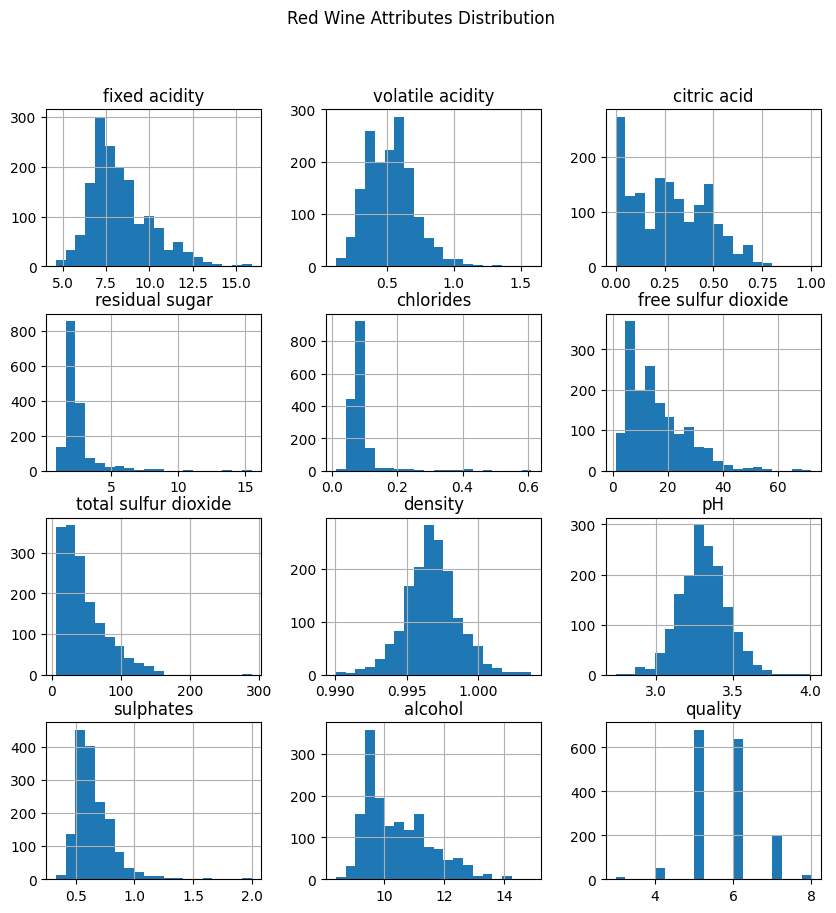

In [ ]:
import matplotlib.pyplot as plt

# Histograms for red wine data
red_wine_data.hist(bins=20, figsize=(10, 10))
plt.suptitle("Red Wine Attributes Distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Defining predictors (X) and target (y) for both datasets
X_red = red_wine_data.drop('quality', axis=1)
y_red = red_wine_data['quality']

# Standardize the features
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)

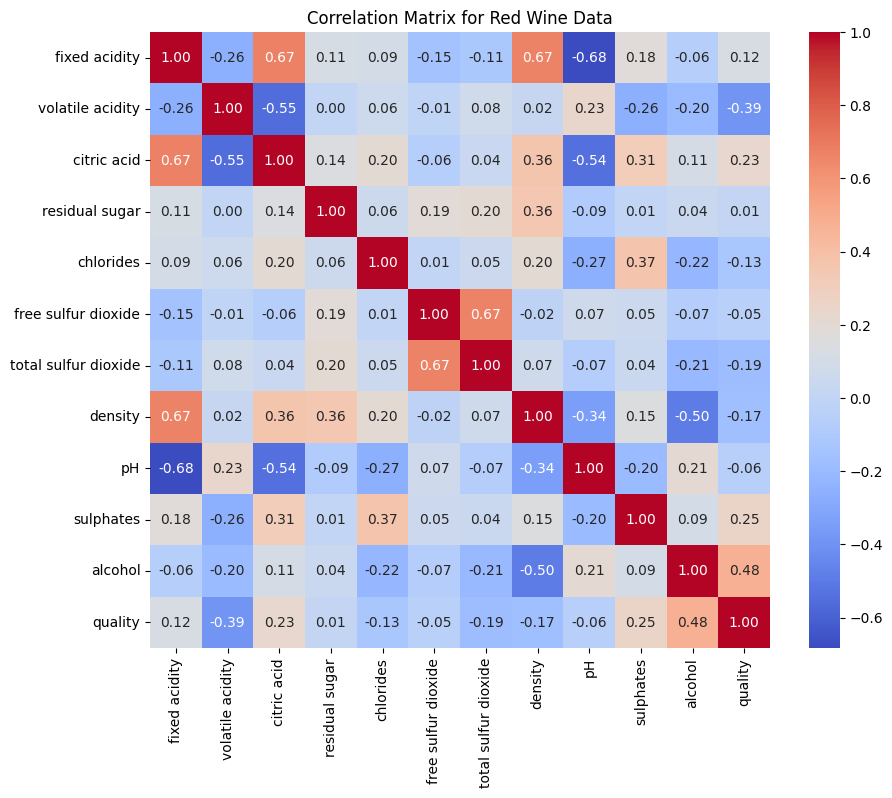

In [ ]:
import seaborn as sns

# Red Wine Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Red Wine Data')
plt.show()

In [ ]:
# Correlation of each attribute with the target variable 'quality'
red_corr_with_quality = red_wine_data.corr()['quality'].sort_values(ascending=False)
print("Red Wine Correlation with Quality:")
print(red_corr_with_quality)

# Selecting attributes with a correlation threshold (e.g., abs(correlation) > 0.1)
important_red_attributes = red_corr_with_quality[abs(red_corr_with_quality) > 0.1].index
print("\nImportant Attributes for Red Wine based on Correlation:")
print(important_red_attributes)

# Subsetting the data to only include important attributes
X_red_selected = red_wine_data[important_red_attributes.drop('quality')]

Red Wine Correlation with Quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Important Attributes for Red Wine based on Correlation:
Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'volatile acidity'],
      dtype='object')


In [ ]:
X_red_scaled_selected = scaler.fit_transform(X_red_selected)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the standardized selected features into training and testing sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_red_scaled_selected, y_red, test_size=0.2, random_state=42)

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define a function to evaluate models for classification
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Classification report with zero_division parameter
    report = classification_report(y_test, predictions, zero_division=1)

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)

    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("Confusion Matrix:\n", cm)

Plain Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Parameters for GridSearchCV
params_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}

# GridSearchCV for Decision Tree
grid_dt = GridSearchCV(dt, params_dt, cv=5, scoring='accuracy')  # Use accuracy for classification
grid_dt.fit(X_train_red, y_train_red)

# Best estimator
best_dt = grid_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_dt.best_params_)

# Evaluate the Decision Tree
print("Decision Tree Evaluation:")
evaluate_model(best_dt, X_test_red, y_test_red)

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Evaluation:
Accuracy: 0.5469

Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      1.00        10
           5       0.64      0.67      0.65       130
           6       0.52      0.50      0.51       132
           7       0.46      0.50      0.48        42
           8       0.33      0.20      0.25         5

    accuracy                           0.55       320
   macro avg       0.49      0.31      0.48       320
weighted avg       0.54      0.55      0.57       320

Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 0  0  5  4  1  0]
 [ 0  1 87 41  1  0]
 [ 0  5 40 66 20  1]
 [ 0  0  3 17 21  1]
 [ 0  0  1  0  3  1]]


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Parameters for GridSearchCV
params_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')  # Use accuracy for classification
grid_rf.fit(X_train_red, y_train_red)

# Best estimator
best_rf = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Evaluate the Random Forest
print("Random Forest Evaluation:")
evaluate_model(best_rf, X_test_red, y_test_red)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Evaluation:
Accuracy: 0.6625

Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.71      0.76      0.73       130
           6       0.62      0.72      0.66       132
           7       0.72      0.43      0.54        42
           8       0.00      0.00      1.00         5

    accuracy                           0.66       320
   macro avg       0.67      0.32      0.49       320
weighted avg       0.67      0.66      0.66       320

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 33 95  4  0]
 [ 0  0  0 23 18  1]
 [ 0  0  0  2  3  0]]


Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42)

# Parameters for GridSearchCV
params_ada = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}

# GridSearchCV for AdaBoost
grid_ada = GridSearchCV(ada, params_ada, cv=5, scoring='accuracy')  # Use accuracy for classification
grid_ada.fit(X_train_red, y_train_red)

# Best estimator
best_ada = grid_ada.best_estimator_
print("Best parameters for AdaBoost:", grid_ada.best_params_)

# Evaluate the AdaBoost Classifier
print("AdaBoost Evaluation:")
evaluate_model(best_ada, X_test_red, y_test_red)

Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 100}
AdaBoost Evaluation:
Accuracy: 0.5437

Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.61      0.75      0.67       130
           6       0.48      0.58      0.53       132
           7       1.00      0.00      0.00        42
           8       1.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.85      0.22      0.20       320
weighted avg       0.63      0.54      0.49       320

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 97 33  0  0]
 [ 0  0 55 77  0  0]
 [ 0  0  2 40  0  0]
 [ 0  0  0  5  0  0]]


XGBoost Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()

# Fit and transform the training target variable
y_train_encoded = le.fit_transform(y_train_red)

# Transform the testing target variable
y_test_encoded = le.transform(y_test_red)

# XGBoost Classifier
xgb = XGBClassifier(eval_metric='mlogloss')  # Removed use_label_encoder parameter

# Parameters for GridSearchCV
params_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 10]}

# GridSearchCV for XGBoost
grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train_red, y_train_encoded)

# Best estimator
best_xgb = grid_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_xgb.best_params_)

# Evaluate the XGBoost Classifier
print("XGBoost Evaluation:")
evaluate_model(best_xgb, X_test_red, y_test_encoded)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
XGBoost Evaluation:
Accuracy: 0.6625

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00        10
           2       0.71      0.75      0.73       130
           3       0.62      0.70      0.66       132
           4       0.68      0.55      0.61        42
           5       0.00      0.00      1.00         5

    accuracy                           0.66       320
   macro avg       0.67      0.33      0.50       320
weighted avg       0.67      0.66      0.66       320

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 97 32  1  0]
 [ 0  0 31 92  7  2]
 [ 0  0  0 19 23  0]
 [ 0  0  0  2  3  0]]


Visualizing the models

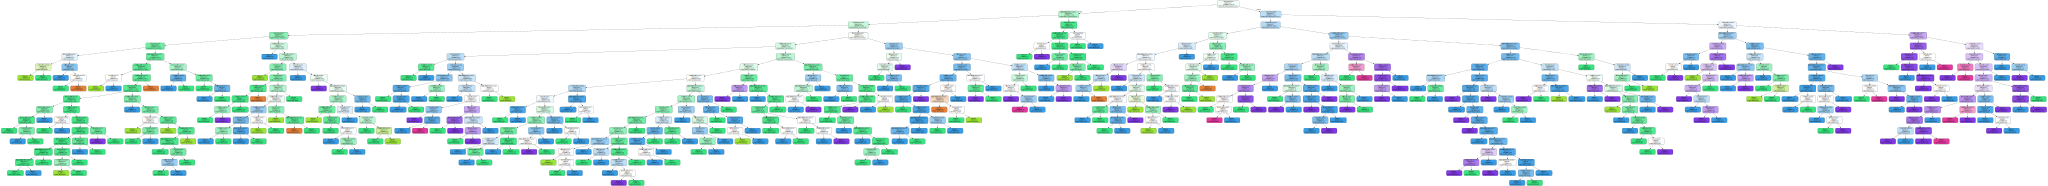

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the best Decision Tree
dot_data = export_graphviz(best_dt, out_file=None,
                           feature_names=X_red_selected.columns,
                           filled=True, rounded=True, special_characters=True)

# Create graph from dot data
graph = graphviz.Source(dot_data)
graph

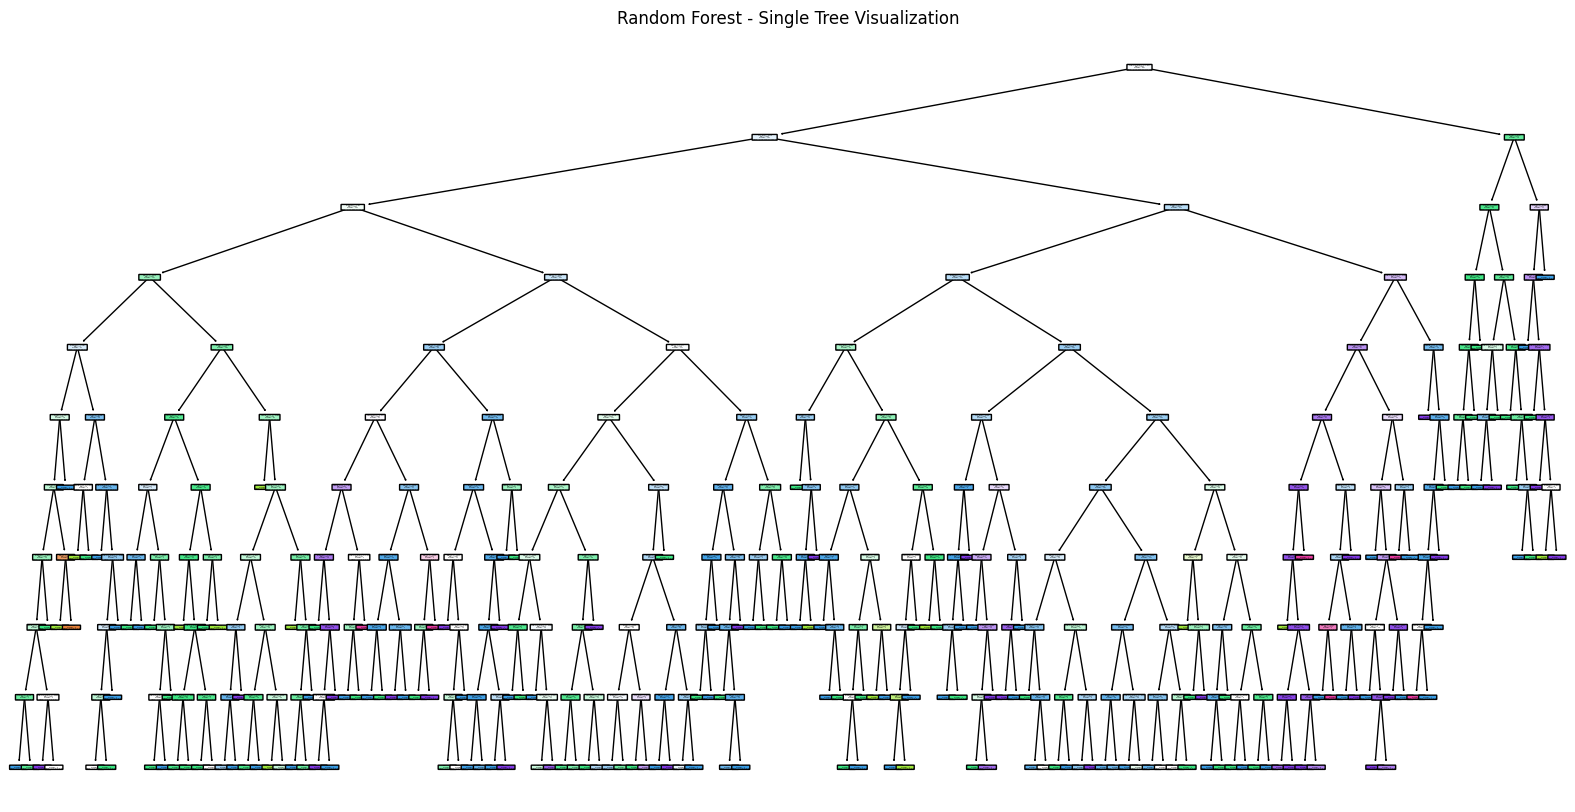

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize a single tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=X_red_selected.columns, filled=True, rounded=True)
plt.title("Random Forest - Single Tree Visualization")
plt.show()

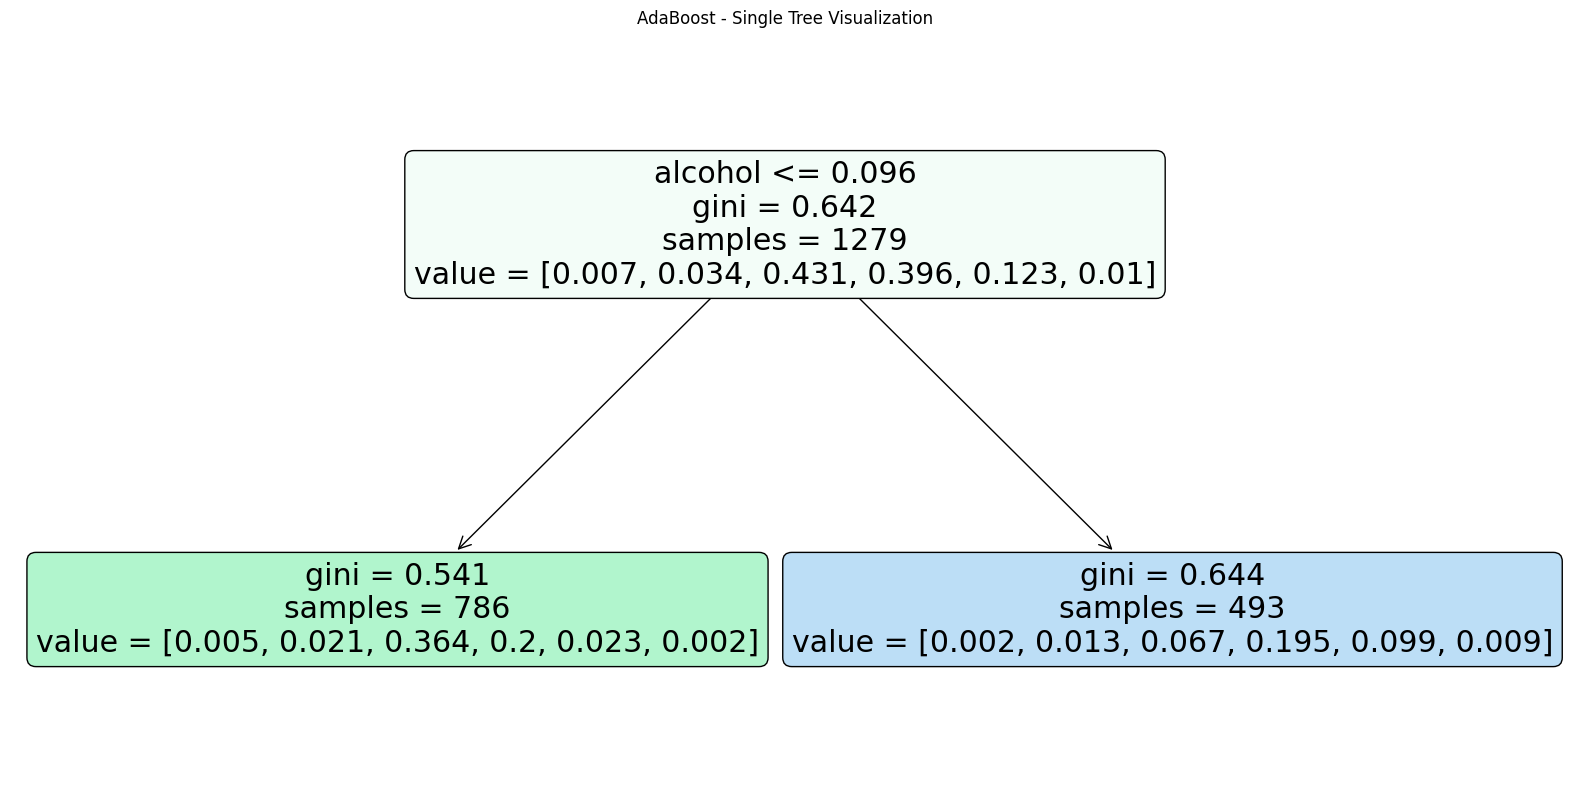

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize a single weak learner (tree) from AdaBoost
plt.figure(figsize=(20, 10))
plot_tree(best_ada.estimators_[0], feature_names=X_red_selected.columns, filled=True, rounded=True)
plt.title("AdaBoost - Single Tree Visualization")
plt.show()

In [ ]:
from xgboost import plot_tree

# Visualize a single tree from the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(best_xgb, num_trees=0)  # Visualizing the first tree
plt.title("XGBoost - Single Tree Visualization")
plt.show()

<Figure size 2000x1000 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


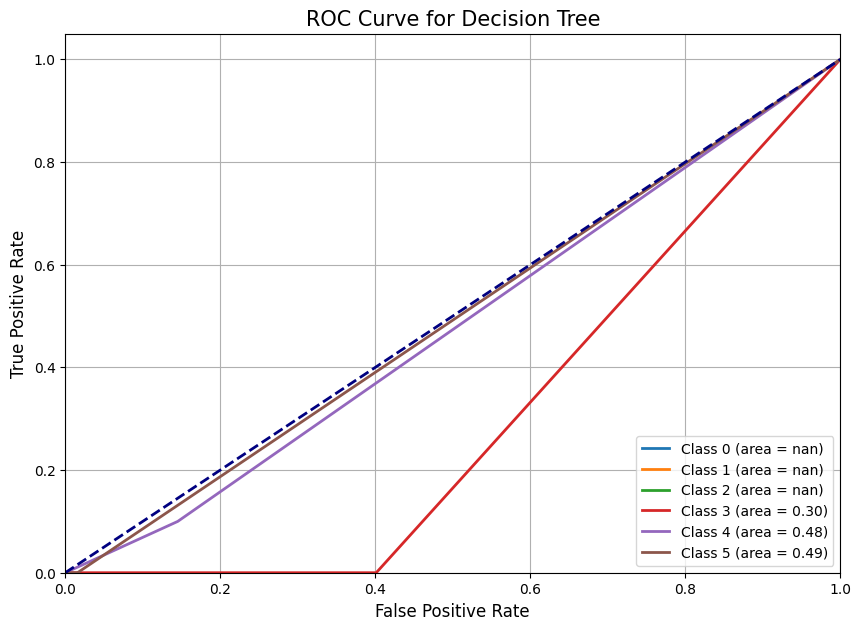

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


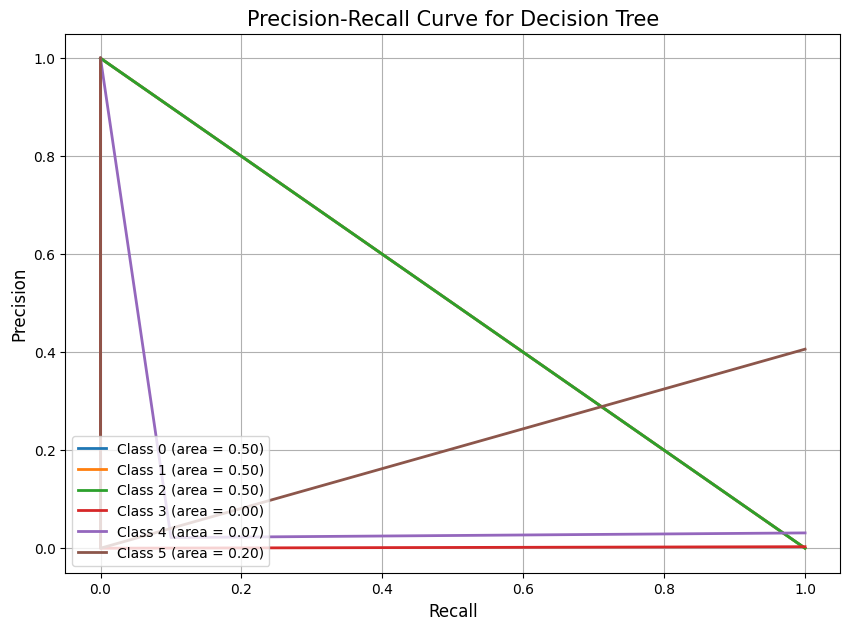

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


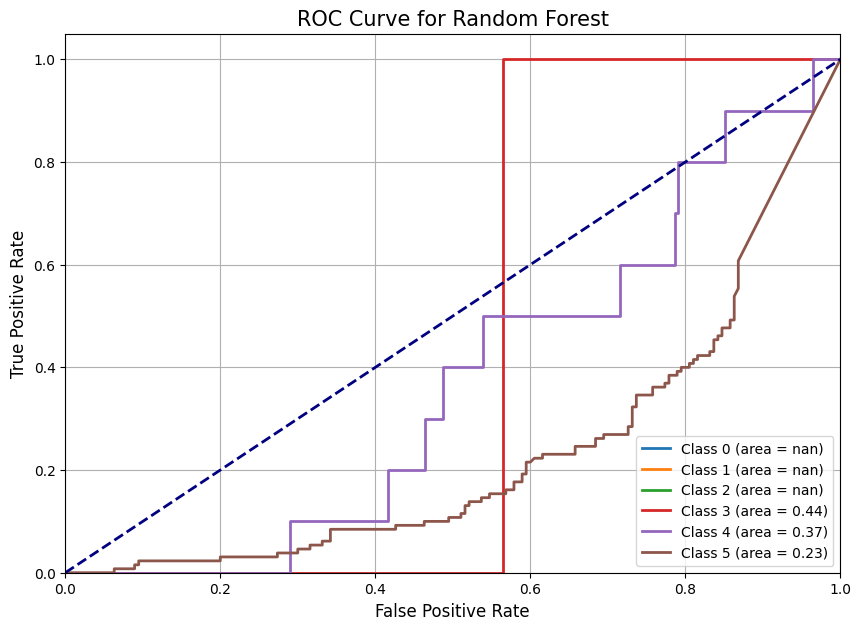

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


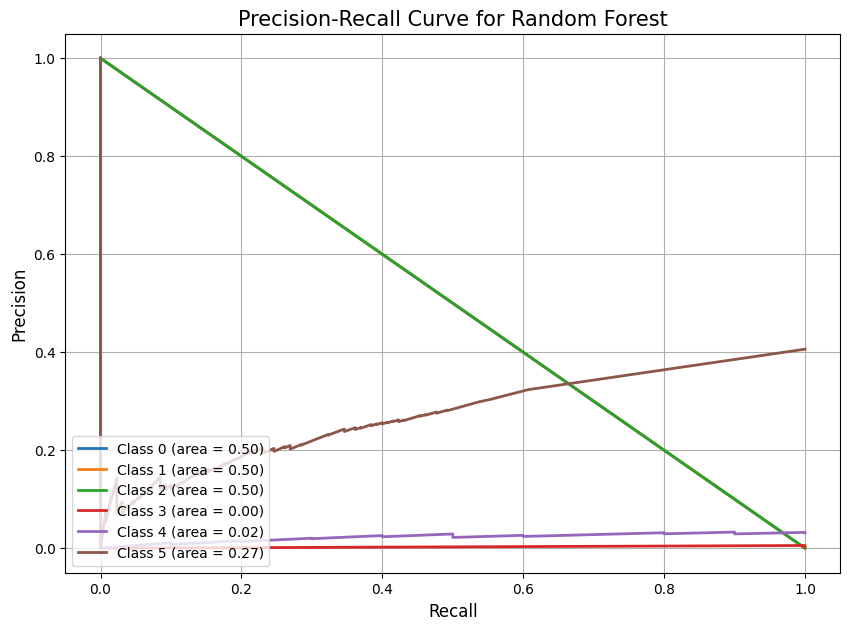

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


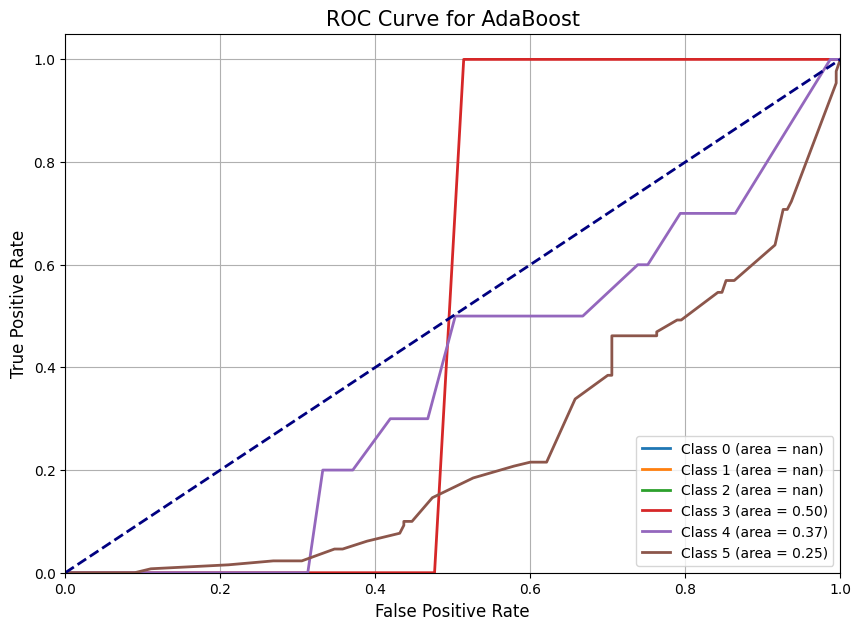

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


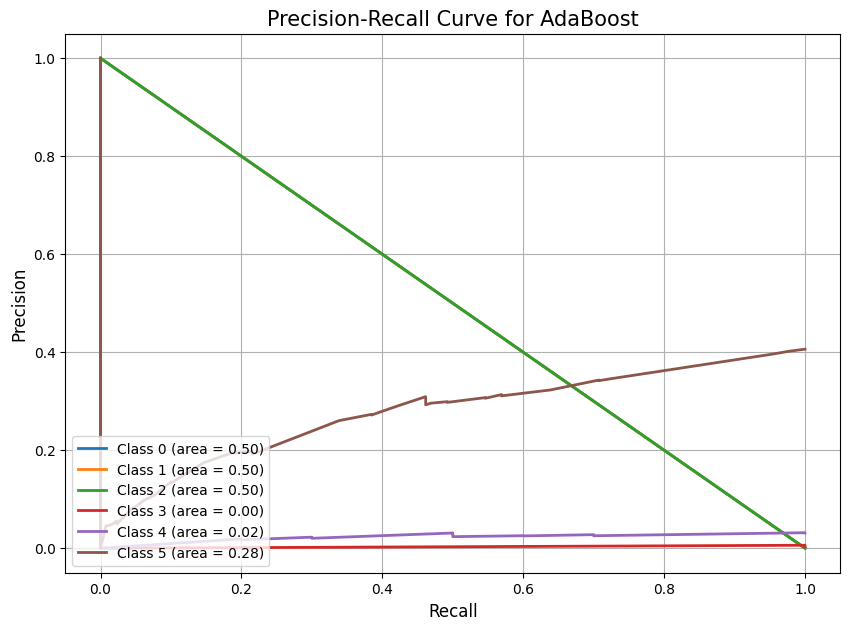

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


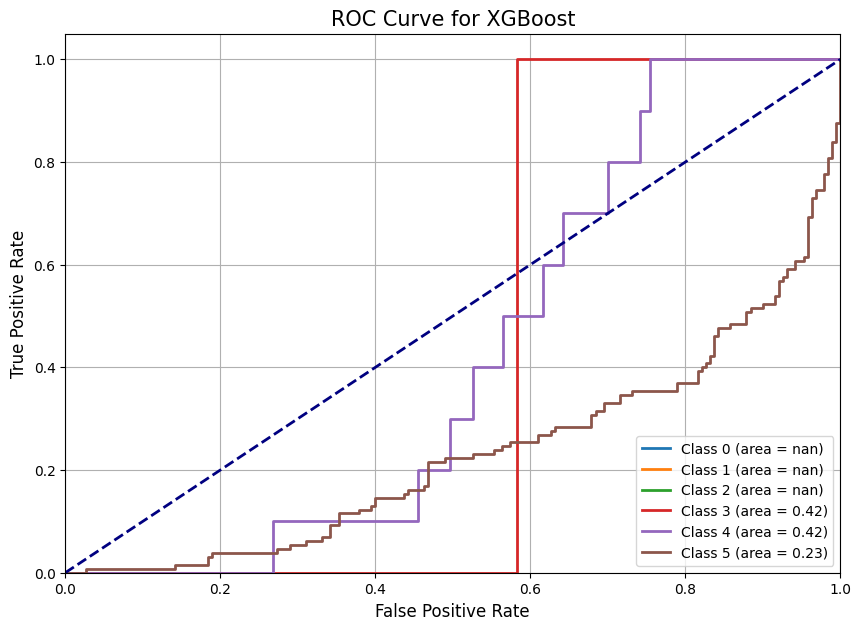

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


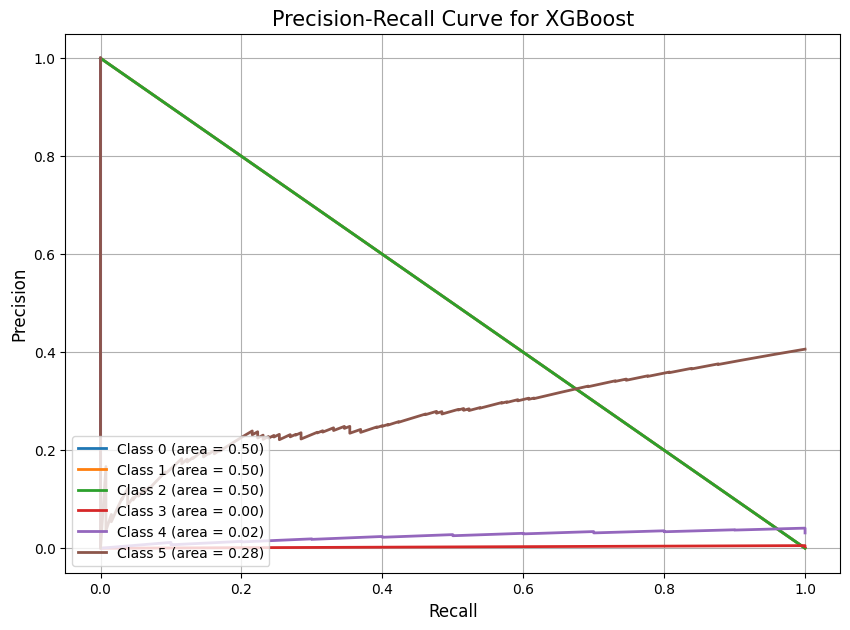

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:
        y_pred_prob = model.decision_function(X_test)

    # One-vs-Rest strategy: compute ROC curve for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(np.unique(y_test))

    # Create ROC curves for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class with improved styling
    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:0.2f})')

    # Reference line
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

    # Set axis limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve for {model_name}', fontsize=15)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
    else:
        y_pred_prob = model.decision_function(X_test)

    # One-vs-Rest strategy: compute Precision-Recall curve for each class
    precision = {}
    recall = {}
    pr_auc = {}
    n_classes = len(np.unique(y_test))

    # Create Precision-Recall curves for each class
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_prob[:, i])
        pr_auc[i] = auc(recall[i], precision[i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (area = {pr_auc[i]:0.2f})')

    # Set axis labels and title
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=15)
    plt.legend(loc="lower left", fontsize=10)
    plt.grid(True)
    plt.show()

plot_roc_curve(best_dt, X_test_red, y_test_red, "Decision Tree")
plot_precision_recall_curve(best_dt, X_test_red, y_test_red, "Decision Tree")

plot_roc_curve(best_rf, X_test_red, y_test_red, "Random Forest")
plot_precision_recall_curve(best_rf, X_test_red, y_test_red, "Random Forest")

plot_roc_curve(best_ada, X_test_red, y_test_red, "AdaBoost")
plot_precision_recall_curve(best_ada, X_test_red, y_test_red, "AdaBoost")

plot_roc_curve(best_xgb, X_test_red, y_test_red, "XGBoost")
plot_precision_recall_curve(best_xgb, X_test_red, y_test_red, "XGBoost")
